# Emotion Detection from Text

Import all the libraries/packages necessary

In [11]:
import pandas as pd
import numpy as np
from sklearn import svm
import nltk
from imblearn.over_sampling import SMOTE
import itertools
import re
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from autocorrect import spell
stop_words = set(stopwords.words('english')) 

In [12]:
reviews=pd.read_csv("text_emotion.csv")     #assign the data file to a varibale using pandas dataframe

In [13]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 4 columns):
tweet_id     40000 non-null int64
sentiment    40000 non-null object
author       40000 non-null object
content      40000 non-null object
dtypes: int64(1), object(3)
memory usage: 1.2+ MB


In [14]:
reviews['sentiment'].unique()

array(['empty', 'sadness', 'happiness', 'surprise', 'love', 'hate',
       'boredom', 'anger'], dtype=object)

In [15]:
# function to get the replace the short forms with dictionary forms
def load_slang():
    slangdict = dict()
    with open('slang.txt','rt') as f:
        for line in f:
            spl = line.split('\t')
            slangdict[spl[0]] = spl[1][:-1]
    return slangdict

slang_words = load_slang()

In [16]:
# function to remove the elongated words
def remove_elongated(text):
    pattern = re.compile(r"(.)\1{2,}")
    return pattern.sub(r"\1\1", text)

In [17]:
# data cleaning function 

def data_cleaning(tweet, slang_words):
    
    lem = WordNetLemmatizer()
    
    tweet = re.sub("@[\w\d]+", "", tweet)           #delete any references to other people
    tweet = re.sub("http:[\w\:\/\.]+","", tweet)    #replace url's
    tweet = re.sub('[^[A-Za-z]\s]','', tweet)      #replace non alphabets and non spaces
    tweet=  re.sub('[^a-zA-Z]',' ', tweet)         #remoce non words (special characters)
    tweet = re.sub('[^\w\s]','', tweet)            #remove white spaces
    tweet = tweet.lower()
    
    tweet = ''.join(''.join(s)[:2] for _, s in itertools.groupby(tweet))
    
    tokens = nltk.tokenize.word_tokenize(tweet)
    
    tokens = [token if token not in slang_words else slang_words[token] for token in tokens]
    
    tokens = [token for token in tokens if not token in stop_words]
    
    tokens = [lem.lemmatize(token) for token in tokens]
    
    tokens = [remove_elongated(token) for token in tokens]
    
    tokens = [spell(token) for token in tokens]
    
    tokens = [token if len(token)>1 else token.replace(token,"") for token in tokens ]
        
    return tokens
    

In [22]:
reviews['content'] = reviews['content'].map(lambda x: data_cleaning(x, slang_words))
print(reviews['content'])

0        [know, listening, bad, habit, earlier, started...
1             [laying, bed, headache, ughs, waiting, call]
2                      [funeral, ceremony, gloomy, friday]
3                               [want, hang, friend, soon]
4             [want, trade, someone, houston, ticket, one]
5         [pinging, go, prom, bc, boyfriend, like, friend]
6        [sleep, im, thinking, old, friend, want, marri...
7                                                    [hmm]
8                                   [Charlene, love, miss]
9                                   [sorry, least, friday]
10                                    [cant, fall, asleep]
11                                      [choked, retainer]
12              [ugh, beat, stupid, song, get, next, rude]
13       [watch, hill, london, realise, torture, week, ...
14                                             [got, news]
15                              [storm, electricity, gone]
16                                                [agree

In [38]:
reviews

,tweet_id,sentiment,author,content,POSTags,num_of_words
0,1956967341,empty,xoshayzers,know listening bad habit earlier started freak...,"[(know, VB), (listening, VBG), (bad, JJ), (hab...",8
1,1956967666,sadness,wannamama,laying bed headache ughs waiting call,"[(laying, VBG), (bed, NN), (headache, NN), (ug...",6
2,1956967696,sadness,coolfunky,funeral ceremony gloomy friday,"[(funeral, JJ), (ceremony, NN), (gloomy, NN), ...",4
3,1956967789,happiness,czareaquino,want hang friend soon,"[(want, JJ), (hang, NN), (friend, NN), (soon, ...",4
4,1956968416,empty,xkilljoyx,want trade someone houston ticket one,"[(want, JJ), (trade, NN), (someone, NN), (hous...",6
5,1956968477,sadness,xxxPEACHESxxx,pinging go prom bc boyfriend like friend,"[(pinging, VBG), (go, VB), (prom, JJ), (bc, JJ...",7
6,1956968487,sadness,ShansBee,sleep im thinking old friend want married damn...,"[(sleep, JJ), (im, NN), (thinking, VBG), (old,...",11
7,1956968636,sadness,mcsleazy,hmm,"[(hmm, NN)]",1
8,1956969035,sadness,nic0lepaula,Charlene love miss,"[(Charlene, NNP), (love, VBP), (miss, NN)]",3
9,1956969172,sadness,Ingenue_Em,sorry least friday,"[(sorry, JJ), (least, JJS), (friday, JJ)]",3


In [25]:
reviews['content'] = reviews['content'].apply(lambda x: ' '.join(x))

In [26]:
reviews

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,know listening bad habit earlier started freak...
1,1956967666,sadness,wannamama,laying bed headache ughs waiting call
2,1956967696,sadness,coolfunky,funeral ceremony gloomy friday
3,1956967789,happiness,czareaquino,want hang friend soon
4,1956968416,empty,xkilljoyx,want trade someone houston ticket one
5,1956968477,sadness,xxxPEACHESxxx,pinging go prom bc boyfriend like friend
6,1956968487,sadness,ShansBee,sleep im thinking old friend want married damn...
7,1956968636,sadness,mcsleazy,hmm
8,1956969035,sadness,nic0lepaula,Charlene love miss
9,1956969172,sadness,Ingenue_Em,sorry least friday


Pos tagging of data using the nltk package 

In [27]:
from nltk import word_tokenize, pos_tag, pos_tag_sents
reviews['POSTags'] = pos_tag_sents(reviews['content'].apply(word_tokenize).tolist())

In [28]:
reviews['num_of_words'] = reviews["content"].str.split().apply(len)

In [85]:
reviews

,tweet_id,sentiment,author,content,POSTags,num_of_words
0,1956967341,empty,xoshayzers,know listening bad habit earlier started freak...,"[(know, VB), (listening, VBG), (bad, JJ), (hab...",8
1,1956967666,sadness,wannamama,laying bed headache ughs waiting call,"[(laying, VBG), (bed, NN), (headache, NN), (ug...",6
2,1956967696,sadness,coolfunky,funeral ceremony gloomy friday,"[(funeral, JJ), (ceremony, NN), (gloomy, NN), ...",4
3,1956967789,happiness,czareaquino,want hang friend soon,"[(want, JJ), (hang, NN), (friend, NN), (soon, ...",4
4,1956968416,empty,xkilljoyx,want trade someone houston ticket one,"[(want, JJ), (trade, NN), (someone, NN), (hous...",6
5,1956968477,sadness,xxxPEACHESxxx,pinging go prom bc boyfriend like friend,"[(pinging, VBG), (go, VB), (prom, JJ), (bc, JJ...",7
6,1956968487,sadness,ShansBee,sleep im thinking old friend want married damn...,"[(sleep, JJ), (im, NN), (thinking, VBG), (old,...",11
8,1956969035,sadness,nic0lepaula,Charlene love miss,"[(Charlene, NNP), (love, VBP), (miss, NN)]",3
9,1956969172,sadness,Ingenue_Em,sorry least friday,"[(sorry, JJ), (least, JJS), (friday, JJ)]",3
10,1956969456,empty,feinyheiny,cant fall asleep,"[(cant, JJ), (fall, NN), (asleep, NN)]",3


In [86]:
# drop the length of sentence which has less than 1 words

reviews = reviews.drop(reviews[reviews.num_of_words < 1].index)

In [87]:
reviews

,tweet_id,sentiment,author,content,POSTags,num_of_words
0,1956967341,empty,xoshayzers,know listening bad habit earlier started freak...,"[(know, VB), (listening, VBG), (bad, JJ), (hab...",8
1,1956967666,sadness,wannamama,laying bed headache ughs waiting call,"[(laying, VBG), (bed, NN), (headache, NN), (ug...",6
2,1956967696,sadness,coolfunky,funeral ceremony gloomy friday,"[(funeral, JJ), (ceremony, NN), (gloomy, NN), ...",4
3,1956967789,happiness,czareaquino,want hang friend soon,"[(want, JJ), (hang, NN), (friend, NN), (soon, ...",4
4,1956968416,empty,xkilljoyx,want trade someone houston ticket one,"[(want, JJ), (trade, NN), (someone, NN), (hous...",6
5,1956968477,sadness,xxxPEACHESxxx,pinging go prom bc boyfriend like friend,"[(pinging, VBG), (go, VB), (prom, JJ), (bc, JJ...",7
6,1956968487,sadness,ShansBee,sleep im thinking old friend want married damn...,"[(sleep, JJ), (im, NN), (thinking, VBG), (old,...",11
8,1956969035,sadness,nic0lepaula,Charlene love miss,"[(Charlene, NNP), (love, VBP), (miss, NN)]",3
9,1956969172,sadness,Ingenue_Em,sorry least friday,"[(sorry, JJ), (least, JJS), (friday, JJ)]",3
10,1956969456,empty,feinyheiny,cant fall asleep,"[(cant, JJ), (fall, NN), (asleep, NN)]",3


In [88]:
reviews['content'].apply(lambda x: print(x.split()))

['know', 'listening', 'bad', 'habit', 'earlier', 'started', 'freaking', 'part']
['laying', 'bed', 'headache', 'ughs', 'waiting', 'call']
['funeral', 'ceremony', 'gloomy', 'friday']
['want', 'hang', 'friend', 'soon']
['want', 'trade', 'someone', 'houston', 'ticket', 'one']
['pinging', 'go', 'prom', 'bc', 'boyfriend', 'like', 'friend']
['sleep', 'im', 'thinking', 'old', 'friend', 'want', 'married', 'damn', 'amp', 'want', 'scandalous']
['Charlene', 'love', 'miss']
['sorry', 'least', 'friday']
['cant', 'fall', 'asleep']
['choked', 'retainer']
['ugh', 'beat', 'stupid', 'song', 'get', 'next', 'rude']
['watch', 'hill', 'london', 'realise', 'torture', 'week', 'week', 'late', 'watch', 'itonlinelol']
['got', 'news']
['storm', 'electricity', 'gone']
['sleepy', 'even', 'late', 'fail']
['lady', 'gaga', 'tweeted', 'impressed', 'video', 'leaking', 'know']
['convinced', 'always', 'wanted', 'signal', 'give', 'damn', 'think', 'lost', 'another', 'friend']
['oh', 'bad', 'hope', 'get', 'better', 'sleep', '

['ugh', 'frustrating', 'see', 'brief', 'week', 'group', 'mostly', 'traditional', 'agency']
['oh', 'dear', 'traveller', 'moved', 'onto', 'land', 'near', 'house', 'always', 'leave', 'bloody', 'mess', 'council', 'take', 'year', 'clean']
['pet', 'apartment', 'really', 'want', 'rat', 'yet']
['going', 'work', 'soon']
['oh', 'see', 'mean', 'heltershelter', 'person', 'laugh', 'loud', 'yer', 'look', 'scary']
['sleep', 'wake', 'Soo', 'early']
['hot', 'today', 'must', 'weekday']
['going', 'see', 'le', 'mi', 'tonight', 'myonlysanction', 'ugh', 'jealous', 'aw', 'im', 'sucker', 'musical']
['good', 'morning', 'people', 'good', 'old', 'germany', 'Soo', 'cold']
['dead', 'like', 'awsome', 'loved', 'show', 'missed', 'last', 'episode', 'tho']
['like', 'tha', 'dj', 'comp', 'hell', 'wack', 'gud', 'dj', 'got', 'free', 'gud']
['fed', 'three', 'hungry', 'stray', 'kitty', 'three', 'tuna', 'hope', 'stay', 'warm', 'safe', 'tonight']
['internet', 'blackberry', 'looked', 'checking', 'tweet', 'whether', 'hill', 'tak

['wow', 'stood', 'might', 'well', 'go', 'work']
['im', 'really', 'tired', 'much', 'time', 'sleep']
['help', 'need', 'stalker', 'police', 'give', 'number']
['handle', 'tg']
['wednesday', 'joking', 'soon', 'partway']
['attempt', 'somehow', 'extend', 'inner', 'class', 'would', 'close', 'closure', 'find', 'ref', 'atm']
['im', 'going', 'miss', 'Khayy', 'much']
['going', 'recording', 'needle', 'sting', 'heart', 'YouTube', 'something', 'missed', 'stream']
['sad', 'day', 'love', 'year', 'ago']
['miss', 'tomorrow', 'friday', 'day', 'usually', 'lounged', 'around', 'trying', 'figure']
['best', 'way', 'start', 'day']
['alone', 'old', 'house', 'thanks', 'net', 'keep', 'alive', 'kicking', 'whoever', 'invented', 'net', 'wan', 'na', 'kiss', 'hair']
['exactly', 'problem', 'pure', 'classical', 'music', 'cant', 'joy']
['going', 'get', 'full', 'night', 'sleep', 'tonight', 'arm', 'get', 'better', 'fun', 'forced', 'use', 'left', 'hand']
['scanning', 'pic']
['learn', 'walk', 'day', 'sprint', 'sprinkler', 'wi

['environmental', 'study', 'driving', 'mental']
['headache', 'wife', 'situation', 'finally', 'decided', 'go', 'med', 'much']
['iPod', 'touch', 'worth', 'money', 'thinking', 'buying', 'one', 'iPod', 'dead', 'since', 'morning']
['ahahah', 'thanks', 'clearing']
['forget', 'completely', 'abt', 'uploading', 'assignment', 'remembered', 'co', 'twit']
['wiki', 'project', 'going', 'wait', 'another', 'month', 'manager', 'think', 'need', 'load', 'time', 'prepare', 'halved', 'workload']
['good', 'morning', 'sunshine', 'sleepytown', 'sleepy']
['also', 'ride', 'giant', 'squid', 'knew', 'ama', 'kafta', 'go', 'try', 'get', 'later', 'love', 'xx']
['getting', 'ready', 'day', 'work', 'till', 'close']
['work', 'actual', 'work']
['found', 'wont', 'know', 'uni', 'result', 'year', 'th', 'july', 'earliest', 'hate', 'wait']
['oh', 'good', 'wanting', 'watch', 'movie', 'nobody', 'would', 'watch']
['wish', 'going', 'pay', 'summer', 'jam', 'never', 'seem', 'win']
['WW', 'sad', 'get', 'go', 'going', 'away', 'party'

['glad', 'see', 'sun', 'dublin', 'great', 'week', 'london', 'back', 'work']
['yes', 'apnea', 'prob', 'med', 'might', 'causing', 'help', 'otherwise', 'much', 'want', 'stop']
['darn', 'keep', 'forgetting', 'darn', 'quot', 'quot', 'dm']
['dont', 'know', 'didnt', 'even', 'realize', 'gone', 'let', 'put', 'darn', 'twitter']
['wan', 'na', 'know', 'fun', 'way', 'wake', 'panic', 'attack', 'able', 'breath', 'fucking', 'reason', 'fucking', 'sucked']
['showered', 'struggling', 'drive', 'get', 'door', 'gloomy', 'miss', 'sway']
['hubby', 'staying', 'one', 'week', 'uzbekistan']
['well', 'piss', 'get', 'site', 'work', 'come', 'thru', 'phone']
['congrats', 'graduate', 'beautiful', 'thing', 'amp', 'big', 'deal', 'wish', 'curve', 'attended', 'Lil', 'man', 'Ryan', 'keg', 'graduation', 'feel', 'sad']
['failure', 'using', 'Lacie', 'drive']
['little', 'beetle', 'feeling', 'love', 'search', 'bring', 'zilch', 'bar', 'peep', 'appear', 'funny']
['fuck', 'rehearsal', 'got', 'space', 'room', 'booked', 'brother', '

['miss', 'friend', 'plan', 'time', 'long', 'day', 'work', 'ahahah']
['michael', 'porter', 'haunting', 'ugh', 'five', 'force', 'remember', 'strategy', 'competitive', 'advantage']
['pretty', 'took', 'like', 'hour', 'you', 'are']
['fuck', 'tony']
['cash', 'looking', 'trade', 'find']
['bummer', 'going', 'try', 'make', 'commitment', 'afraid', 'got', 'way', 'next', 'time', 'hopefully']
['totally', 'except', 'ride', 'sidewalk', 'like', 'kid', 'lot', 'safe', 'road', 'crazy', 'driver']
['hope', 'find', 'store', 'take']
['tired', 'sad']
['shopping', 'therapeutic', 'bettering', 'need', 'financing', 'therapy', 'however']
['wet', 'dirty', 'one']
['look', 'like', 'another', 'sober', 'weekend', 'ahead']
['tried', 'edit', 'page', 'add', 'name', 'pop', 'list', 'please']
['load', 'size', 'happened', 'im', 'upset']
['miss', 'laughing', 'till', 'stomach', 'hurt']
['life', 'suck']
['glad', 'nice', 'gray', 'sky', 'rainy', 'wisconsin']
['waiting', 'yet', 'please', 'let']
['ugh', 'poor', 'beautiful', 'girl', 

['meant', 'seeing', 'lot', 'tonight', 'six', 'ran']
['urge', 'go', 'shopping', 'hmm', 'got', 'money']
['well', 'normal', 'day', 'already', 'done', 'work', 'unfortunately', 'normal', 'day', 'mean', 'office', 'till', 'late']
['well', 'poop', 'guitar', 'lesson', 'canceled', 'today', 'sad', 'hope', 'son', 'feel', 'better', 'soon', 'tho']
['oh', 'god', 'guy', 'know', 'getting', 'nasty', 'head', 'hurt']
['back', 'vet', 'good']
['everyone', 'abandoning', 'office', 'still', 'hour', 'go']
['waiting', 'long', 'line', 'chick', 'fil']
['line', 'waiting', 'knew']
['need', 'brankie', 'train', 'icebox']
['love', 'leave']
['people', 'wi', 'fi', 'cell', 'hub', 'mean', 'kinda', 'grid', 'tweet', 'take', 'like', 'minute']
['came', 'home', 'getting', 'ratty', 'shop', 'staff', 'blister', 'foot']
['shaw', 'guy', 'want', 'sleeping']
['well', 'poop', 'look', 'like', 'office', 'key', 'key', 'neighbor', 'key', 'bike', 'ride']
['know', 'work', 'keen', 'paying', 'though', 'nary', 'social', 'network']
['went', 'get

['feel', 'like', 'need', 'cry', 'believe', 'le', 'year', 'ill', 'walking', 'across', 'stage', 'get', 'high', 'school', 'diploma']
['pin', 'last', 'lunch', 'dubb']
['saw', 'web', 'awesome', 'loved', 'song', 'im', 'sad', 'cuz', 'couldnt', 'wake', 'early', 'started']
['pay', 'sale', 'tax', 'great', 'even', 'worse', 'mom', 'pop', 'business', 'double', 'pay', 'business', 'license']
['quite', 'cool', 'day', 'charlie', 'ben', 'aswell', 'got', 'lost', 'stung', 'nettle']
['stressing', 'core', 'supposed', 'cleaning', 'room', 'feel', 'like', 'crap']
['anyways', 'point', 'dying', 'spend', 'summer', 'somewhere', 'hot', 'guy']
['feel', 'like', 'shit', 'continue', 'long', 'take']
['believe', 'spending', 'lunch', 'break', 'inside', 'desk']
['finishing', 'one', 'shift', 'min', 'drive', 'half', 'hour', 'start', 'till', 'back', 'tomorrow', 'sunny']
['suffering', 'hayfever', 'drowsy', 'much', 'portion', 'heading', 'bed', 'air', 'purifier']
['back', 'lunch', 'pouring', 'rain', 'ugh', 'oh', 'well', 'least',

['would', 'working', 'today']
['poor', 'goose']
['getting', 'weekend', 'aw', 'really', 'want']
['need', 'move', 'ny', 'saffron', 'seattle', 'get', 'worth', 'crap', 'internet', 'speed']
['head', 'throbbing', 'lack', 'sleep', 'still', 'mucho', 'work', 'feel', 'like', 'friday']
['week', 'one', 'day', 'go']
['got', 'back', 'lunch', 'feeling', 'like', 'nap', 'order', 'work', 'press']
['miss', 'baby', 'together', 'haha', 'dreading', 'taking', 'kennel']
['work', 'boo']
['kidding', 'az', 'landmark', 'kinda', 'news', 'make', 'sad']
['woot', 'laugh', 'loud', 'gon', 'na', 'hard', 'send', 'one', 'back']
['raining', 'wish']
['ate', 'many', 'kiss']
['Soo', 'sleepy', 'last', 'day', 'school', 'today', 'sniffle']
['dunno', 'tipsy', 'gave', 'everything', 'st', 'set', 'still', 'lost', 'sure', 'mental', 'state', 'injury', 'bad', 'timing']
['return', 'sideways', 'fuck', 'med', 'bill']
['aw', 'stink', 'sorry']
['le', 'month', 'im', 'done', 'high', 'school', 'oh', 'friend']
['raining', 'day']
['im', 'stats',

['ugh', 'know', 'even', 'care', 'Nicole', 'Richie', 'missed', 'tv', 'last', 'nite', 'despite', 'twitter']
['george', 'sad', 'go', 'car', 'ride', 'dad']
['sick', 'happy', 'th', 'Amanda']
['WW', 'yeah', 'fun', 'revising', 'others', 'get', 'distracted', 'easier', 'gt', 'lt', 'yeah', 'tired', 'revising', 'history']
['getting', 'yearbook', 'today', 'strange']
['dark', 'outside']
['getting', 'early']
['mm', 'pizza', 'dinner', 'yum', 'burnt', 'mouth', 'though']
['respect', 'travis', 'clark', 'gone', 'notch']
['anyone', 'ticket', 'MTV', 'movie', 'award', 'guy', 'scammed']
['despertando', 'megadespistado', 'ire', 'la', 'Lego', 'full', 'fin', 'de', 'Seana', 'beach', 'sadr', 'en', 'wild']
['wanted', 'sadly', 'work', 'today', 'normally', 'work', 'friday', 'either']
['willie', 'pouting', 'grandma', 'put', 'treat', 'food']
['bet', 'man', 'wish', 'could', 'went', 'whr', 'even', 'go', 'home', 'weekend', 'life', 'six']
['sneezed', 'three', 'time', 'quick', 'succession', 'three', 'four', 'record']
['tro

['giving', 'si', 'show', 'crib', 'sunday', 'incredible', 'jewelry', 'designer', 'gone']
['watched', 'movie', 'beautiful', 'sad', 'time']
['phone', 'disconnect', 'internet', 'right', 'middle', 'user', 'also', 'first', 'tweet', 'inside', 'steam']
['also', 'toy', 'story', 'teaser', 'carmine', 'said', 'would', 'toy', 'story', 'movie', 'theater', 'fail']
['thanks', 'tip', 'otherinbox', 'work', 'outlook']
['porter', 'making', 'sad', 'panda']
['grass', 'mowed', 'playtime', 'say', 'errand', 'run']
['whoopee', 'TGIF', 'fun', 'job']
['get', 'new', 'one', 'wk']
['something', 'different', 'text', 'around', 'difference', 'whatsoever']
['stopped', 'drug']
['work', 'starving']
['ahh', 'hate', 'internet', 'people', 'learn', 'quot', 'native', 'widget', 'always', 'best', 'quot']
['totally', 'forgot', 'phone', 'home', 'morning']
['man', 'two', 'clock', 'hr', 'till', 'work']
['show', 'lunch', 'eating', 'solo', 'noodle']
['fairly', 'upset', 'fact', 'twitter', 'session', 'commence', 'without', 'sam']
['demi

['phew', 'long', 'day', 'havent', 'gotten', 'work', 'yet']
['want', 'see', 'bud', 'mel', 'miss', 'load']
['geneva', 'picture', 'isnt', 'showing', 'dont', 'think', 'im', 'right']
['say', 'hi', 'depressed', 'cause', 'cant', 'see']
['anyone', 'want', 'cooked', 'dan', 'heating', 'bedroom']
['napping', 'work']
['wish', 'could', 'play', 'guitar', 'guitar', 'got', 'christmas', 'ago', 'collecting', 'dust', 'need', 'learn', 'haha']
['traveling', 'today', 'see', 'grandpa', 'hospital', 'yet', 'another', 'road', 'block', 'cross', 'fro', 'family']
['understanding', 'would', 'require', 'taking', 'paragraph', 'context', 'para', 'could', 'lead', 'opting', 'every', 'class']
['sunburn', 'starting', 'peel']
['sweltering', 'afternoon', 'wonder', 'creepy', 'slithering', 'snake', 'heading', 'creek', 'nasty', 'thing', 'swim', 'frightening', 'detail']
['hm', 'guess']
['bad', 'week', 'connectivity', 'arlington', 'Panora', 'WiFi', 'suck', 'maybe', 'head', 'legal', 'seafood', 'airport', 'dang', 'missing', 'metav

['roll', 'floor', 'laughing', 'even', 'kept', 'insurance', 'payment', 'im', 'still', 'like', 'good', 'thing', 'applied', 'day', 'job', 'past', 'mo']
['wishing', 'could', 'Paulo', 'show', 'fortunately', 'went', 'brasilia', 'one', 'haha']
['even', 'old', 'doll', 'new', 'one', 'look', 'like', 'sailor', 'moon']
['work', 'mostly']
['ya', 'heading', 'family', 'vara', 'hope', 'paparazzo', 'leave', 'alone']
['man', 'cant', 'belive', 'everything', 'look', 'good']
['could', 'probably', 'get', 'craig', 'list', 'list', 'cry', 'later']
['watching', 'Jon', 'amp', 'Kate', 'plus', 'believe', 'divorcing']
['last', 'session', 'day']
['feel', 'left', 'alone', 'az', 'laugh', 'loud']
['someone', 'take', 'care', 'im', 'sick']
['im', 'sorry']
['hey', 'funny', 'stopped', 'get', 'coffee', 'way', 'spilt', 'half', 'car']
['producing', 'anchoring', 'sad', 'goodbye', 'miss', 'Lynne', 'ashminov', 'miss']
['Santana', 'maria', 'maria', 'wraith']
['sulking', 'home', 'rained', 'poor', 'strategy', 'watching', 'sun', 'sh

['cant', 'sleep', 'dont', 'deserve', 'know']
['ouch', 'really', 'hurt']
['think', 'blog', 'list']
['really', 'good', 'definitely', 'many', 'people', 'getting', 'burned', 'alive']
['stop', 'bit', 'rush', 'rehearsal', 'quiet', 'tonight']
['oh', 'joined', 'twitter', 'day', 'ago']
['sorry', 'dead', 'gon', 'na']
['another', 'long', 'day', 'hallmark']
['beautiful', 'day', 'today', 'love', 'sunshine', 'missing', 'man', 'though', 'away', 'weekend', 'xx']
['kinda', 'sad', 'poking', 'huh']
['plan', 'got', 'ruined', 'Blackstone', 'going', 'carnival', 'tomorrow', 'weather', 'good']
['hate', 'watching', 'news', 'awful', 'thing', 'happen']
['nothing', 'near', 'right']
['wonderful', 'let', 'know', 'think', 'light', 'reading']
['must', 'admit', 'though', 'part', 'want', 'get', 'put']
['traffic', 'backed', 'inbound', 'lincoln', 'tunnel']
['oh', 'god', 'nightmare']
['raid', 'leader', 'made', 'run', 'drill', 'practice', 'switching']
['back', 'work']
['getting', 'ready', 'work']
['feel', 'lost', 'keep', '

['think', 'iv', 'hurt', 'tooth', 'Eilis', 'cassie', 'drawing', 'competition', 'draw', 'cooky', 'pineapple', 'haha']
['follower', 'random', 'spammer']
['theyre', 'sapping', 'Mah', 'sentry', 'err', 'yea', 'without', 'power', 'home', 'right']
['working', 'hour', 'saturday', 'sunday', 'least', 'phone', 'keep', 'company']
['downhill', 'labor', 'day']
['creative', 'vaso', 'stock', 'Walmart', 'com', 'missed', 'thanks', 'tweeting']
['Hollie', 'steel', 'absolutely', 'excruciating', 'watch', 'poor', 'girl']
['tube', 'closed', 'th', 'th', 'june', 'idea', 'get', 'venue']
['actually', 'got', 'bit', 'tan', 'today', 'haha', 'sadly', 'working', 'weekend', 'get', 'chance', 'enjoy', 'glorious', 'sunray', 'boo']
['told', 'people', 'indiana', 'ratshit', 'lived', 'feel', 'like', 'escaped', 'orwell', 'book', 'everyday']
['sad', 'see', 'deb', 'two', 'day']
['hey', 'quot', 'Cameron', 'quot', 'know', 'amazing', 'sunburn', 'mum', 'happy', 'amp', 'throat', 'kill', 'still', 'lt']
['hope', 'make', 'bank', 'close',

['know', 'got', 'round', 'watching', 'cried']
['way', 'rub', 'guy', 'send', 'everyone', 'love', 'wish', 'could']
['hey', 'tried', 'calling', 'wont', 'let']
['make', 'plan', 'none']
['recovering', 'hard', 'day', 'homeschooling', 'dd', 'chemistry', 'go', 'well']
['much', 'tell', 'blip', 'immune', 'system', 'recovered', 'yet', 'newborn', 'give', 'month', 'nothing']
['wow', 'still', 'void', 'thomas', 'left', 'heartache', 'never', 'going', 'go', 'away']
['wow', 'free', 'WiFi', 'amp', 'amp', 'pay', 'parking', 'ridiculous']
['darn', 'dont', 'guitar', 'tomorrow']
['ticked', 'cause', 'go', 'see', 'quot', 'drag', 'hell', 'quot', 'melissa', 'amber', 'staying', 'home', 'friday', 'night', 'thing']
['love', 'puppy']
['oh', 'know']
['haha', 'let', 'know', 'show', 'hope', 'romania', 'show', 'MTV', 'sunday', 'morning', 'exam']
['six', 'foot', 'theme', 'JJ']
['come', 'seem', 'excited', 'play', 'dc']
['upload', 'picture', 'already', 'hate', 'twitter']
['going', 'outta', 'two', 'night', 'sorry']
['BBQ', '

['found', 'parent', 'putting', 'dog', 'tomorrow', 'morning', 'upset']
['sound', 'like', 'terrific', 'service', 'sorry', 'hear', 'mom']
['guy', 'said', 'wanted', 'spank']
['palm', 'pre', 'record', 'video']
['honestly', 'home', 'alone']
['fuck', 'winter', 'due', 'til', 'monday', 'freezing']
['watching', 'et', 'today', 'lt', 'supposed', 'clip', 'new', 'moon', 'hating', 'drag', 'hell']
['ellen', 'got', 'lie', 'sad', 'rite']
['star', 'son', 'hard', 'review', 'grab', 'instantly', 'morning', 'delay', 'review', 'nd', 'listening', 'tomorrow']
['miss', 'bein']
['got', 'fully', 'denied', 'tonight', 'sleep', 'time', 'morn']
['JST', 'wednesday']
['going', 'staring', 'hello', 'kitty', 'face']
['lost', 'please', 'help', 'find', 'good', 'home']
['gym', 'fun']
['bad', 'life', 'gotten', 'recounting', 'church', 'raffle', 'answer', 'real', 'bad']
['cute', 'think', 'make', 'makerfaire', 'sadly']
['lost', 'please', 'help', 'find', 'good', 'home']
['oh', 'god', 'want', 'go', 'ahahah']
['really', 'awesome', '

['know', 'never', 'answered']
['feeling', 'right', 'hope', 'feeling', 'pas', 'stupid', 'stomach']
['got', 'gon', 'na', 'go', 'unto', 'bed', 'sec', 'drunk', 'disgusted', 'haha']
['wan', 'na', 'go', 'home']
['still', 'stuck', 'office', 'working']
['file', 'disc', 'work', 'pippin']
['Glenna', 'bored', 'glad', 'beautiful', 'day', 'Macy', 'went', 'swimming', 'kris', 'played', 'golf', 'sat', 'home', 'waiting']
['really', 'sick', 'tired', 'body', 'resisting', 'rest']
['excited', 'new', 'pushing', 'daisy', 'episode', 'make', 'much', 'worse', 'finally', 'gotten', 'cancellation']
['grin', 'trying', 'save', 'cash', 'next', 'month', 'vacation']
['work', 'hour']
['always', 'forget', 'something', 'travel', 'newark', 'airport']
['Marley', 'cry', 'ball', 'throwing', 'keep', 'eying', 'door']
['saddest', 'movie', 'ever', 'seen']
['going', 'suffolk', 'tomorrow', 'however', 'mb', 'amp', 'planning', 'picnic', 'mall', 'friend', 'Neil', 'amp', 'Jodi']
['life', 'went', 'get', 'ticket', 'time', 'low', 'sold', 

['laugh', 'loud', 'gon', 'na', 'water', 'prob', 'cold', 'heck']
['mile', 'run', 'meter', 'swim', 'thing', 'looking', 'better', 'better', 'laying', 'bike', 'today']
['disney', 'store', 'treating', 'well', 'hour', 'really', 'want', 'go', 'Willdon', 'anything', 'go', 'show']
['yeah', 'need', 'Fricke', 'cell', 'number', 'ive', 'tried', 'home', 'month', 'busy', 'miss', 'brand']
['dice', 'searched', 'quot', 'help', 'quot', 'area', 'problem', 'people', 'would', 'hot', 'oh', 'well']
['far', 'tried', 'kill', 'twice', 'min', 'outside', 'tripping', 'stupid', 'thing', 'knew', 'stayed', 'bed']
['oh', 'hm', 'want', 'screw', 'mine']
['school', 'mo', 'started']
['spoke', 'culture', 'racker', 'castle', 'time', 'awesome', 'mexican', 'food', 'drinking', 'antibiotic']
['twitter', 'spam', 'oh']
['wish', 'going', 'venue', 'vancouver']
['rehearsal', 'rob', 'felucca', 'thingy', 'next', 'month', 'nothing', 'like', 'learning', 'new', 'song', 'last', 'minute']
['ani', 'sorry']
['dagnabbitt', 'wan', 'na', 'go', '

['smash', 'im', 'followed', 'gt', 'gt', 'paramere', 'lt', 'lt']
['everything', 'nothing', 'hmm']
['saw', 'none', 'baddie', 'best']
['WW', 'thank', 'asking', 'people', 'follow']
['hey', 'girl', 'new', 'follower', 'think', 'awesome', 'gotten', 'chance', 'get', 'close', 'Donnie', 'cool']
['watching', 'Jonas']
['must', 'time', 'go', 'home', 'yes', 'indeedy']
['keep', 'character', 'limitation', 'soon', 'writing', 'like', 'shakespeare', 'garrulous', 'fourth', 'grade', 'scribe']
['arab', 'chili', 'shode', 'blog', 'che', 'away', 'KE', 'miriam', 'man']
['storm', 'system', 'looked', 'bring', 'rain', 'today', 'going', 'miss']
['got', 'back', 'karaoke', 'bar', 'metron', 'watching', 'millionaire', 'matchmaker']
['laugh', 'loud', 'brandy', 'mr', 'whisker']
['trusted', 'matt', 'life', 'picture', 'funny', 'night', 'though']
['favorite', 'thing', 'fuzzball', 'swine', 'flu']
['wished', 'could', 'last', 'night', 'sound', 'like', 'rocking', 'wait', 'see', 'pix', 'vids']
['hi', 'uploaded', 'completely', 'n

['unloading', 'leopard', 'tank', 'next', 'office', 'window', 'hope', 'piss', 'anyone']
['could', 'thing', 'without', 'live', 'expectation']
['follow', 'laugh', 'loud']
['oh', 'grandpa', 'stable', 'detail', 'til', 'tomorrow', 'visit', 'keep', 'fam', 'prayer', 'thank', 'goodnite']
['happy', 'star', 'war', 'day', 'may', 'th']
['mostly', 'yellow', 'green']
['rain', 'pretty', 'nice', 'meter', 'cobble', 'way']
['going', 'dinner', 'bb']
['hun', 'yes', 'yes']
['rain', 'please', 'come']
['dad', 'taking', 'school', 'amp', 'picking', 'took', 'plus', 'drama', 'almost', 'day', 'score', 'bludge', 'day']
['glad', 'co', 'wouldnt', 'lose', 'fan', 'anyway', 'get', 'see', 'guy', 'saturday', 'evening', 'leicester', 'better', 'good']
['planning', 'surviving', 'financial', 'status', 'quitting', 'job', 'got', 'ta', 'find', 'new', 'job', 'within', 'month']
['muhahaha', 'joined', 'tweet', 'cult', 'laugh', 'loud', 'hey', 'way', 'twitterific', 'good', 'iPhone', 'app', 'use']
['okay', 'ist', 'mit', 'defined', 'au

['sky', 'diving', 'aawwesome', 'kinda', 'bored', 'though']
['oh', 'Chris', 'sorry', 'mr', 'raccoon', 'obviously', 'female', 'cuz', 'female', 'specie', 'would', 'adore', 'hug', 'angel']
['go', 'small', 'cafe', 'could', 'get', 'english', 'breakfast', 'pound', 'im', 'uk']
['right', 'turn', 'october', 'think', 'pretty', 'much', 'make', 'awesome']
['beach', 'sea', 'really', 'flat']
['mm', 'athletic']
['gon', 'na', 'say', 'probably', 'kill', 'ya', 'serve', 'sentence', 'living', 'insurance', 'cash', 'insured', 'right', 'laugh', 'loud']
['let', 'check', 'sir']
['touched', 'change', 'hr', 'kill', 'heading', 'penang', 'must', 'fly', 'singapore', 'air', 'often']
['yeah', 'like']
['musicmonday', 'happy', 'star', 'war', 'day', 'celebrate', 'joining', 'tech', 'net', 'forum']
['congrats', 'dress', 'good', 'luck', 'sa', 'interview']
['hope', 'reviewed', 'site']
['hi', 'welcome', 'twitterverse', 'help', 'anything', 'ask']
['umm', 'ya', 'mean', 'ship']
['yay', 'finally', 'get', 'trip', 'away', 'home', '

['laugh', 'as', 'listening', 'great', 'bob', 'Marley', 'wow', 'awesome']
['live', 'pain', 'bring']
['oh', 'log', 'pity', 'great']
['mom', 'like', 'miaow', 'version', 'Ayo', 'technology', 'good', 'thing', 'clue']
['hmm', 'interesting', 'choice']
['never', 'ever', 'smoking', 'around']
['go', 'bubble', 'bath', 'always', 'relaxing']
['know', 'exactly', 'mean', 'treat', 'awhile']
['ahahah', 'thank', 'feel', 'love']
['hi', 'thanks', 'following', 'teach', 'chinese', 'lesson', 'YouTube', 'PLS', 'feel', 'free', 'look', 'WW', 'YouTube', 'com', 'chineselearn']
['love', 'game', 'xx']
['thanks', 'little', 'star', 'offered', 'come', 'ja', 'weekender', 'dunno', 'afford', 'go', 'looking']
['thanks', 'support']
['worry', 'none', 'got', 'one', 'next', 'question', 'start', 'minute', 'get', 'thinking', 'cap']
['hope', 'moment', 'inspire', 'political', 'journey', 'back', 'home', 'best']
['bom', 'dia', 'Frito', 'que', 'del', 'cia', 'good', 'luck', 'first', 'day', 'Ju']
['ooh', 'baby', 'wan', 'na', 'hug']
['

['illy', 'note', 'book', 'quot', 'one', 'geek', 'another', 'keep', 'good', 'work', 'quot', 'sigh', 'missed', 'great', 'espresso']
['let', 'hope']
['would', 'believe', 'put', 'bookmark']
['eating', 'rice', 'breakfast', 'yes']
['good', 'great', 'day', 'already', 'amp', 'dr', 'miracle', 'feel', 'formula', 'really', 'work', 'laugh', 'loud', 'hope', 'everyone', 'good', 'day', 'well']
['day', 'till', 'th', 'day']
['dude', 'read', 'wrong', 'haha', 'well', 'good', 'good', 'thanks', 'agree']
['problem', 'glad']
['ah', 'lovely', 'day', 'bike', 'ride', 'cake', 'making', 'rooting', 'revising', 'best']
['baby', 'baby', 'gon', 'na', 'right', 'side', 'whole', 'world', 'turn', 'iPod', 'randoms', 'bob', 'song']
['quot', 'like', 'monday', 'wish', 'sunday', 'cause', 'fun', 'day', 'quot', 'freaking', 'jam', 'little', 'miss']
['considered', 'cordoning', 'corner', 'park', 'beware', 'quot', 'swine', 'flu', 'quot', 'sign', 'might', 'clear']
['say', 'yes', 'shall', 'say']
['show', 'amazing', 'keep']
['come', '

['meant', 'say', 'created', 'profile', 'twitter', 'laugh', 'loud', 'begin', 'twittering', 'today', 'thanks', 'showed', 'jay', 'day', 'bash']
['garden', 'never', 'looked', 'good', 'thanks', 'spring', 'rain', 'course', 'helped', 'spent', 'day', 'weeding']
['hope', 'went', 'well', 'rooting', 'comfort', 'able', 'world', 'phd', 'application', 'form', 'filling', 'xx']
['raining', 'Calicut']
['wow', 'cool', 'bytheway', 'love', 'new', 'tv', 'show']
['surprisingly', 'actually', 'super', 'tired', 'would', 'like', 'lay', 'bed', 'though']
['gon', 'na', 'great', 'week', 'dallas', 'next', 'weekend']
['thanks', 'following', 'nice', 'meet']
['near', 'daily', 'exercise', 'starting', 'show', 'result']
['saw', 'male', 'baltimore', 'oriole', 'suet', 'feeder', 'something', 'enjoyed', 'lot', 'thistle', 'new', 'thistle', 'feeder', 'early']
['beatles', 'scouser', 'funny', 'haircut', 'talent', 'banana', 'split']
['pic', 'Donnie', 'one', 'siouxsinner', 'took', 'last', 'night', 'launch', 'word', 'got', 'solo', '

['WATSUP', 'morning']
['man', 'love', 'shelf', 'way', 'go', 'DIY', 'diva']
['time', 'start', 'unfollowing', 'people', 'think']
['going', 'cinema', 'see', 'ghost', 'girlfriend', 'past']
['quot', 'stumble', 'fall', 'moved', 'quot']
['sure', 'boot']
['oh', 'lot', 'put', 'desk', 'year', 'guess', 'done', 'would', 'ok', 'back', 'laugh', 'loud']
['done', 'jack', 'green', 'today', 'good', 'killer', 'walking', 'west', 'hill', 'though', 'listening', 'people']
['got', 'shower', 'sitting', 'towel', 'hate', 'twitterberry', 'reply', 'tweet']
['back', 'sweden', 'great', 'hot', 'sunshine', 'walking', 'around', 'looking', 'red', 'back', 'writing']
['pleasure', 'playing', 'guitar', 'fun']
['oh', 'see']
['using', 'polarash', 'quite', 'time', 'love', 'polar', 'bear', 'nickname', 'favorite', 'number']
['est', 'demain', 'le', 'lancemen', 'de', 'chinatown', 'pa', 'mercredi']
['nope', 'kidding', 'sometimes', 'think', 'forest', 'gump', 'running', 'year']
['got', 'obviously', 'going', 'wrong']
['hate', 'exam', 

['thanks', 'dm', 'festival', 'committee', 'amp', 'really', 'hope', 'public', 'speaking', 'event', 'soon', 'enjoy']
['ok', 'love', 'big', 'buff', 'tattooed', 'preferably', 'christian', 'men', 'strut', 'fluffy', 'dog', 'optional']
['google', 'show', 'apple', 'want', 'see', 'image', 'green', 'cool']
['stayed', 'home', 'school', 'today', 'doctor', 'soon']
['problem', 'loved', 'idea', 'course', 'photo', 'perfect']
['getting', 'sick', 'exam', 'kinda', 'thing', 'well', 'life']
['man', 'great', 'sense', 'humour', 'veney', 'Achad']
['ethereal', 'main', 'preoccupation', 'ethereal', 'preoccupation', 'hum', 'schizophrenic']
['called', 'cell', 'phone', 'would', 'let', 'talk', 'teacher']
['peek', 'boo', 'see']
['sound', 'pretty', 'sweet', 'must', 'loving', 'yeah', 'man', 'sound', 'cool', 'keen']
['ok', 'spent', 'like', 'soundtrack', 'galaxy', 'class', 'starship', 'eve', 'online', 'sigh']
['one', 'like', 'monday']
['yes', 'tax', 'disguise', 'booking', 'fee', 'commission', 'online', 'travel', 'portal'

['im', 'joining', 'twitter', 'laugh', 'loud']
['never', 'prague', 'money', 'first', 'city', 'visit']
['discern', 'request', 'hulu', 'support', 'excellent', 'idea']
['watching', 'shark', 'boy', 'lava', 'girl', 'disney', 'channel', 'hanging', 'sarah', 'jane', 'micah', 'amp', 'Rachel']
['whats', 'going', 'tonight', 'let', 'party']
['oh', 'girl', 'get', 'baby', 'going', 'bed', 'pm']
['oops', 'reply', 'button', 'right', 'msg', 'stop', 'spamming']
['true', 'admit', 'pret', 'Ty', 'funny', 'im', 'bout', 'go', 'tube', 'laugh', 'loud']
['panic', 'Hehe', 'fine', 'email']
['well', 'folkiest', 'im', 'dream', 'land', 'work', 'morning', 'ugh', 'Edwy', 'talk', 'tomorrow', 'lt', 'lurves', 'ya', 'gt']
['looking', 'forward', 'sitting', 'bar']
['whew', 'finally', 'home', 'putting', 'hour', 'lab', 'watching', 'catch', 'eating', 'cheese', 'grape', 'good', 'night']
['get', 'twilightguy', 'show']
['thanks', 'much', 'back', 'tour', 'soon', 'two', 'new', 'book', 'pipeline']
['would', 'like', 'see', 'back', 'add

['farm', 'enjoying', 'Cary', 'ann', 'loving', 'company']
['left', 'brain', 'right', 'brain', 'drug']
['Chilin', 'little', 'brother', 'day', 'amazing', 'XP']
['debut', 'thursday', 'gallery', 'lounge', 'fun', 'wait', 'next', 'one']
['going', 'wit', 'shina', 'amp', 'Gigi', 'movie']
['yes', 'yes']
['uh', 'oh', 'hope', 'nothing', 'damaged']
['seed', 'regionals']
['dizzy', 'ever', 'read', 'uh', 'got', 'one', 'question', 'would', 'ever', 'date', 'fan', 'laugh', 'as']
['listening', 'echo', 'gorilla', 'Zoe', 'ahh', 'love', 'song']
['today', 'dan', 'bought', 'bio', 'dome', 'reality', 'bite', 'soundtrack', 'needle', 'say', 'get', 'mayjah', 'point', 'also', 'tummy', 'happy', 'boo']
['perth', 'ford', 'falcon', 'new', 'ad', 'received', 'posted', 'HMC', 'site', 'soon']
['photo', 'lovely', 'knew', 'talented', 'photographer', 'journalist']
['following', 'wearing', 'converse']
['creative', 'party', 'moi']
['Hehe', 'fun', 'tweet']
['separate', 'yum', 'together', 'gross', 'sounding']
['babysitting', 'text

['parroty', 'playing', 'twister', 'getting', 'tipsy', 'well', 'everyone', 'else', 'laugh', 'loud']
['woohoo', 'went', 'get', 'movie', 'junk', 'food', 'woman', 'night', 'mwahaha', 'gt']
['um', 'really', 'scary', 'please', 'safe', 'way', 'ill', 'orlando', 'next', 'week']
['delish', 'serendipity']
['follows', 'back']
['got', 'good', 'happy', 'mother', 'day']
['ha', 'totally', 'go', 'journalism', 'major', 'perfect', 'fit']
['wait', 'amp', 'Katie', 'always', 'end', 'best', 'interview']
['think', 'Kirk', 'would', 'probably', 'stolen', 'sweet', 'ride', 'fancy', 'car', 'phone', 'ya', 'talk', 'GG']
['though', 'admit', 'seems', 'le', 'amp', 'le', 'tempting', 'time', 'complete', 'package']
['tomorrow', 'mother', 'day', 'hope', 'everybody', 'got', 'mom', 'something', 'awesome', 'least', 'call', 'say', 'hello']
['white', 'house', 'thing', 'lifesaver']
['nope', 'yet', 'one', 'close', 'closing', 'day', 'week']
['yard', 'house']
['today', 'eventful']
['sometimes', 'hate', 'normal', 'worry', 'bout']
['

['happy', 'mother', 'day', 'lovee', 'ami']
['oh', 'yeah', 'happy', 'mother', 'day', 'every', 'mom', 'friend', 'mom']
['love', 'chocolate', 'must', 'pm']
['met', 'sarah', 'kelly', 'wow', 'amazing', 'woman', 'god', 'gave', 'free', 'shirt', 'got', 'ta', 'love', 'free', 'merch']
['signing', 'spend', 'time', 'hubby', 'goodnight', 'day', 'tweedle', 'happy', 'mother', 'day']
['prom', 'Denny', 'Katie', 'kelly', 'lt']
['content', 'life', 'moment']
['little', 'happy', 'wine', 'jefe', 'ok', 'sm', 'free', 'time', 'care', 'java', 'love', 'day']
['glad', 'like']
['mother', 'day', 'somewhere']
['spot', 'tweet', 'without', 'thanks', 'share', 'tonight']
['okay', 'mail', 'laugh', 'loud', 'im', 'hyper', 'much', 'candy', 'amp', 'amp', 'jello']
['yes', 'love', 'manchester', 'orchestra', 'sieur', 'ross', 'band', 'ive', 'never', 'heard', 'ill', 'give', 'listen', 'thanks']
['hi', 'dale', 'welcome', 'man', 'hope', 'weekend', 'going', 'well', 'think', 'would', 'enjoy', 'desert', 'paradise', 'fun', 'fun', 'fun']

['hahhaha', 'indeed', 'kinda', 'like', 'spoon', 'ahahah']
['sidewalk', 'corduroy', 'get', 'ya', 'everytime']
['drinking', 'yay']
['Landon', 'announces', 'quot', 'big', 'poppy', 'coming', 'quot', 'every', 'time', 'waiting', 'yell', 'store', 'first', 'time']
['good', 'hear', 'allah', 'aapko', 'seat', 'de']
['Jarita', 'going', 'home', 'two', 'hot', 'guy', 'drool']
['say', 'much', 'like', 'new', 'twitteriffic']
['yeah', 'tone', 'lost', 'twitter', 'unless', 'use', 'emoticon']
['usa', 'texas', 'jaycees', 'debate', 'team', 'rocked', 'house', 'opportunity', 'represent', 'tunisia', 'africa', 'go', 'jaycees']
['thanks', 'nice', 'appreciate']
['nope', 'tomorrow', 'tired', 'need', 'bed']
['ah', 'remembered', 'hopefully', 'good', 'news', 'coming', 'hopefully', 'soon', 'someone', 'know', 'may', 'happydance', 'commence']
['love', 'time', 'low']
['hmm', 'thats', 'bu', 'tour', 'list', 'thats', 'cool', 'say']
['look', 'like', 'horse', 'sam', 'club', 'card', 'picture', 'find', 'hair', 'brush', 'ahahah', 

['laugh', 'loud', 'love', 'tweet', 'keep', 'coming']
['Norwood', 'house', 'party', 'HAA', 'yay', 'smile']
['crap', 'said', 'word']
['happy', 'mother', 'day', 'mom']
['watching', 'men', 'blk', 'within', 'mum', 'happy', 'mother', 'day']
['believe', 'little', 'brother', 'married']
['win', 'must', 'call']
['ahahah', 'oh', 'god', 'dude', 'read', 'almost', 'choked', 'haha', 'thanks']
['well', 'friend', 'got', 'long', 'day', 'hope', 'going', 'good', 'amp', 'every', 'one', 'happy', 'love', 'night', 'nite']
['going', 'newton', 'soon']
['finished', 'dinner', 'yummy']
['oh', 'love', 'testing', 'drunk', 'friend', 'ahahah']
['pretty', 'sure', 'hero', 'status', 'rock', 'sock', 'McCain']
['limo', 'ride', 'city', 'dinner', 'cruise', 'harbour', 'makeover', 'amp', 'foot', 'back', 'massage', 'yay', 'hope', 'fella', 'get']
['butterfly', 'fly', 'away', 'Miley', 'ray', 'oh', 'amp', 'happy', 'mother', 'day', 'lt', 'love', 'ami']
['chitlin', 'uploading', 'video', 'took', 'MySpace', 'show', 'awesome']
['indust

['thank', 'ICI', 'right', 'back', 'ya']
['happy', 'mother', 'day', 'ANG']
['forgot', 'happy', 'mom', 'day']
['beautiful', 'sunny', 'morning', 'london', 'time', 'morning', 'meditation', 'inspired', 'living']
['well', 'Andy', 'dont', 'think', 'date']
['michael', 'cera', 'new', 'movie']
['resting', 'ahh', 'feel', 'good']
['Ryan', 'stile', 'still', 'funniest', 'man', 'ever', 'got', 'great', 'news', 'great', 'news', 'tonight', 'happy', 'could', 'burst']
['haha', 'know', 'early']
['pleasure', 'making', 'smile', 'nice', 'day', 'making', 'smile', 'well', 'twitter', 'ahh', 'nice']
['dawn', 'hit', 'back', 'told', 'please', 'read', 'pray', 'decide']
['drinking', 'bud', 'light', 'lime']
['okay', 'make', 'sure', 'alright', 'cuidado', 'let', 'know', 'got', 'friend', 'aha']
['dang', 'ya', 'mother', 'day', 'already', 'goodnight', 'twitter', 'world', 'start', 'shooting', 'monday']
['oops', 'got', 'taken']
['haha', 'keep', 'mind', 'far', 'reckon', 'enough', 'money', 'stop', 'hair', 'greying', 'retire']


['understand', 'keep', 'telling', 'make', 'twitter', 'app', 'understand', 'need']
['quot', 'congrats', 'friend', 'ruling', 'canada', 'hug', 'amp', 'grope', 'quot', 'today', 'oi']
['great', 'time', 'family', 'big', 'ups', 'bro', 'si', 'law', 'hanging', 'love', 'peace', 'free']
['let', 'change', 'ulna', 'te', 'em', 'trending', 'topic', 'quot', 'soul', 'girl', 'told', 'em', 'quot']
['wanted', 'let', 'know', 'heard', 'quot', 'give', 'amp', 'quot', 'online', 'radio', 'program']
['ahahah', 'love', 'gabriel', 'absolutely', 'fucking', 'hilarious']
['mother', 'day', 'wish', 'google', 'pretty', 'amp', 'beautiful', 'flower', 'google', 'logo']
['staying', 'mercury']
['anyone', 'still', 'play', 'anymore', 'super', 'Nintendo', 'day', 'best', 'haha', 'many', 'flashback']
['always', 'told', 'keep', 'sucking', 'something', 'like', 'fruit', 'gum']
['day', 'dreaming', 'fuzzball', 'sal', 'ball', 'com', 'twitter']
['lt', 'lt', 'lt', 'like']
['right', 'wave']
['happy', 'mother', 'day', 'mom', 'love']
['cour

['welcome', 'home', 'wherever', 'may']
['sent', 'download', 'link', 'spanish', 'quot', 'cry', 'quot', 'let', 'know', 'get']
['happy', 'mother', 'day']
['sound', 'like', 'good', 'five', 'day']
['probably', 'spamming', 'follower', 'account']
['great', 'pic', 'fun', 'love', 'food', 'wine', 'festival', 'well', 'beer', 'fests']
['lt', 'hence', 'new', 'forum', 'signature']
['jesus', 'heals']
['trying', 'figure', 'use', 'twitter']
['need', 'one', 'follower']
['ok', 'thank']
['toasted', 'baked', 'bean', 'sandwich', 'red', 'wine', 'perfect', 'sunday', 'night', 'dinner', 'combination']
['nothing', 'wrong', 'thinking', 'hot', 'belongs']
['happy', 'mother', 'day', 'wonderful', 'mother']
['really', 'adore', 'popped', 'site', 'popped', 'com', 'haha']
['join', 'biggest', 'beset', 'group', 'Facebook']
['oh', 'yea', 'feel', 'really', 'ferkin', 'tired', 'today']
['hey', 'home', 'sleep', 'cant', 'believe', 'weekend', 'finished', 'fast', 'happy', 'mother', 'day', 'good', 'morning', 'great', 'sleep']
['wel

['nice', 'one', 'ahahah', 'thanks', 'last', 'night', 'lt']
['thanks', 'sharing', 'anything', 'coffee', 'good', 'big', 'fan', 'live']
['gather', 'still', 'asleep']
['last', 'day', 'lonesometown']
['haha', 'dork', 'sound', 'yummy', 'share']
['go', 'church', 'hallelujah']
['tweet', 'people', 'oh', 'right', 'opened', 'houseofrock', 'last', 'night', 'still', 'bed']
['thanks', 'bathroom', 'said']
['good', 'morning', 'twittertakeover']
['body', 'played', 'sims', 'till', 'daddy', 'picked', 'yesterday', 'basically', 'social', 'time']
['th', 'tweet', 'go', 'one', 'talk', 'morning', 'laugh', 'loud', 'lt']
['ever', 'pointless', 'argument', 'drunk', 'mum', 'drunk', 'nan', 'drunk', 'mum', 'boyfriend', 'dinner', 'fun', 'time', 'round', 'ahahah']
['yeah', 'tragic', 'need', 'haircut']
['suffering', 'restless', 'leg', 'butt', 'syndrome']
['im', 'home', 'dinner', 'mum', 'delicious', 'nice', 'good', 'time', 'happy', 'mother', 'day', 'mum']
['oh', 'god', 'love', 'guy', 'thanks', 'keeping', 'entertained', '

['finish', 'book', 'quot', 'nudge', 'quot', 'going', 'write']
['trying', 'fall', 'asleep', 'ancient', 'assignment', 'drinking', 'water', 'ice', 'lime', 'yum']
['think', 'twitter', 'revolution', 'success', 'rove', 'love']
['morning', 'done', 'school', 'work', 'nothing', 'day', 'twitter']
['received', 'first', 'pressie', 'happy', 'happy']
['found', 'prom', 'dress']
['today', 'working', 'quot', 'quirky', 'quot', 'cue', 'maybe', 'become', 'concerto']
['haha', 'yeah', 'like', 'ellen', 'add']
['want', 'see', 'quot', 'fast', 'transport', 'second', 'quot']
['fishing', 'wow', 'listening', 'ska', 'pandora', 'lazy', 'sunday', 'morning']
['laugh', 'loud', 'like', 'cult', 'haha']
['SMB', 'possession', 'sec', 'remaining']
['place', 'find', 'home', 'marilyn', 'serum', 'beach']
['hello', 'new', 'follower', 'suddenly', 'lot', 'take', 'little', 'time', 'get', 'round']
['head', 'feel', 'Soo', 'much', 'better']
['working', 'okay']
['big', 'strong', 'would', 'like', 'pedometer']
['oh', 'love', 'morse', 'ev

0        None
1        None
2        None
3        None
4        None
5        None
6        None
8        None
9        None
10       None
11       None
12       None
13       None
14       None
15       None
17       None
18       None
19       None
20       None
21       None
22       None
23       None
24       None
25       None
26       None
27       None
28       None
29       None
30       None
31       None
         ... 
39968    None
39969    None
39970    None
39971    None
39972    None
39973    None
39974    None
39975    None
39976    None
39977    None
39978    None
39979    None
39980    None
39981    None
39982    None
39983    None
39985    None
39986    None
39987    None
39988    None
39989    None
39990    None
39991    None
39992    None
39993    None
39994    None
39996    None
39997    None
39998    None
39999    None
Name: content, Length: 38309, dtype: object

In [89]:
reviews

,tweet_id,sentiment,author,content,POSTags,num_of_words
0,1956967341,empty,xoshayzers,know listening bad habit earlier started freak...,"[(know, VB), (listening, VBG), (bad, JJ), (hab...",8
1,1956967666,sadness,wannamama,laying bed headache ughs waiting call,"[(laying, VBG), (bed, NN), (headache, NN), (ug...",6
2,1956967696,sadness,coolfunky,funeral ceremony gloomy friday,"[(funeral, JJ), (ceremony, NN), (gloomy, NN), ...",4
3,1956967789,happiness,czareaquino,want hang friend soon,"[(want, JJ), (hang, NN), (friend, NN), (soon, ...",4
4,1956968416,empty,xkilljoyx,want trade someone houston ticket one,"[(want, JJ), (trade, NN), (someone, NN), (hous...",6
5,1956968477,sadness,xxxPEACHESxxx,pinging go prom bc boyfriend like friend,"[(pinging, VBG), (go, VB), (prom, JJ), (bc, JJ...",7
6,1956968487,sadness,ShansBee,sleep im thinking old friend want married damn...,"[(sleep, JJ), (im, NN), (thinking, VBG), (old,...",11
8,1956969035,sadness,nic0lepaula,Charlene love miss,"[(Charlene, NNP), (love, VBP), (miss, NN)]",3
9,1956969172,sadness,Ingenue_Em,sorry least friday,"[(sorry, JJ), (least, JJS), (friday, JJ)]",3
10,1956969456,empty,feinyheiny,cant fall asleep,"[(cant, JJ), (fall, NN), (asleep, NN)]",3


Create TFIDF and Count vectorizer for the given data 

In [90]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# count vectorizer function
vectorizer = CountVectorizer(stop_words='english',ngram_range=(1,2))
countvect_features= vectorizer.fit_transform(reviews.content)

#tfidf values
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(0,1))
features = tfidf.fit_transform(reviews.content).toarray()

labels = reviews.sentiment

print(countvect_features.shape)
labels.shape


(38309, 173319)


(38309,)

# Naive Bayes Model

In [160]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
labels1=lb.fit_transform(labels)

In [187]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
clf = MultinomialNB()
train_X, test_X, train_y, test_y = train_test_split(countvect_features, labels1, train_size=0.8,test_size=0.2,random_state=123)
# sm = SMOTE(random_state=123,ratio='all')
# newtrain_x , newtrain_y = sm.fit_sample(train_X,train_y)
clf.fit(train_X,train_y)
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [188]:
# Predict the test data with the naive bayes model created above.
emotions_predicted=clf.predict(test_X)

In [189]:
# calculate accuracy
from sklearn import metrics
metrics.accuracy_score(test_y,emotions_predicted)

0.45745236230749153

In [190]:
from sklearn.metrics import f1_score
print(metrics.classification_report(test_y,emotions_predicted))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        20
          1       0.00      0.00      0.00        28
          2       0.39      0.20      0.26      1696
          3       0.44      0.51      0.47      1843
          4       0.20      0.00      0.01       248
          5       0.55      0.21      0.31       752
          6       0.48      0.77      0.59      2679
          7       0.12      0.00      0.00       396

avg / total       0.42      0.46      0.41      7662



/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  


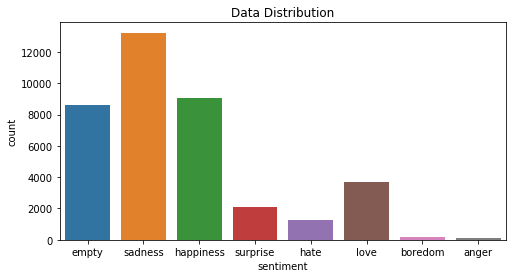

In [191]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,4))

plt.title("Data Distribution")
sns.countplot(x='sentiment',data=(reviews))

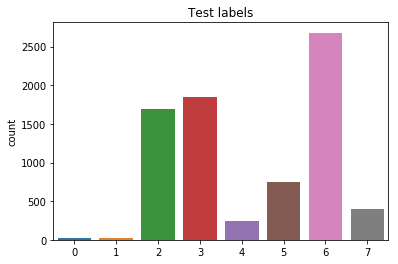

In [192]:
plt.title("Test labels")
sns.countplot(x=(test_y))

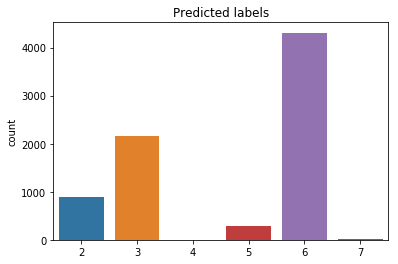

In [193]:
plt.title("Predicted labels")
sns.countplot(x=(emotions_predicted))

# Over-Sampling

In [194]:
d={
0:3000,    
1:3000,
2:10000,
3:10000,
4:4500,
5:6500,
7:5500,
}

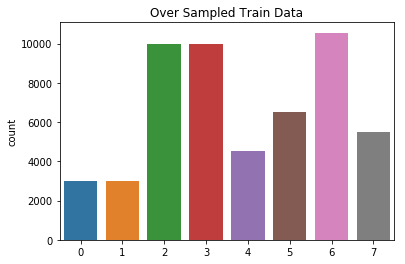

In [195]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=1,sampling_strategy=d)
X_resampled, y_resampled = ros.fit_resample(train_X, train_y)

plt.title("Over Sampled Train Data")
sns.countplot(x=(y_resampled))

In [197]:
clf2 = MultinomialNB()
clf2.fit(X_resampled, y_resampled)
emotions_predicted2=clf2.predict(test_X)
from sklearn import metrics
print(metrics.accuracy_score(test_y,emotions_predicted2))
from sklearn.metrics import f1_score
print(metrics.classification_report(test_y,emotions_predicted2))

0.4350039154267815
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        20
          1       0.14      0.25      0.18        28
          2       0.36      0.28      0.31      1696
          3       0.42      0.49      0.45      1843
          4       0.20      0.16      0.18       248
          5       0.40      0.40      0.40       752
          6       0.55      0.59      0.57      2679
          7       0.10      0.07      0.08       396

avg / total       0.42      0.44      0.43      7662



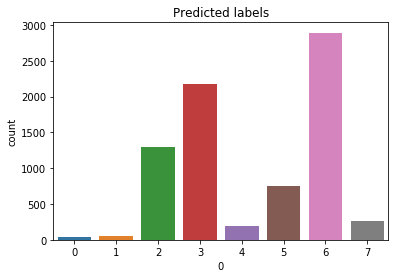

In [199]:
lMapping = {l: i for i, l in enumerate(lb.classes_)}
plt.title("Predicted labels")
sns.countplot(x=0,data=pd.DataFrame(emotions_predicted2))